In [36]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [40]:
# Load the dataset
df = pd.read_csv('StudentsPerformance[2].csv')

# Display the first few rows
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [42]:
df.isnull().sum()
df.fillna(0, inplace=True)
df.drop_duplicates(inplace=True)

In [6]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df[ 'race/ethnicity']=le.fit_transform(df['race/ethnicity'])
df['parental level of education']=le.fit_transform(df['parental level of education'])
df['lunch']=le.fit_transform(df['lunch'])
df['test preparation course']=le.fit_transform(df['test preparation course'])
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [8]:
X = df.drop('math score', axis=1)  # Features (all columns except 'math score')
y = df['math score']               # Target (the 'math score' column)


In [9]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection using chi-square test
chi2_selector = SelectKBest(chi2, k=7)  # Selecting the top 10 features
X_new = chi2_selector.fit_transform(X_train, y_train)

# Get chi-squared scores and p-values
f_score, p_values = chi2(X_train, y_train)

# Print the chi-squared scores and p-values
print("Chi-squared scores:", f_score)
print("P-values:", p_values)



Chi-squared scores: [  40.99181008   62.61733305  103.7807528    53.41260749   34.26185363
 1664.02186603 1803.99853553]
P-values: [9.99656498e-001 8.64707335e-001 1.88430329e-002 9.77136000e-001
 9.99990657e-001 3.87267309e-297 0.00000000e+000]


In [10]:
import pandas as pd

# Create a pandas Series with p-values and feature names as the index
p_values = pd.Series(p_values, index=X_train.columns)

# Sort p-values in ascending order
p_values.sort_values(ascending=True, inplace=True)

# Display sorted p-values
print(p_values)


writing score                   0.000000e+00
reading score                  3.872673e-297
parental level of education     1.884303e-02
race/ethnicity                  8.647073e-01
lunch                           9.771360e-01
gender                          9.996565e-01
test preparation course         9.999907e-01
dtype: float64


<Axes: >

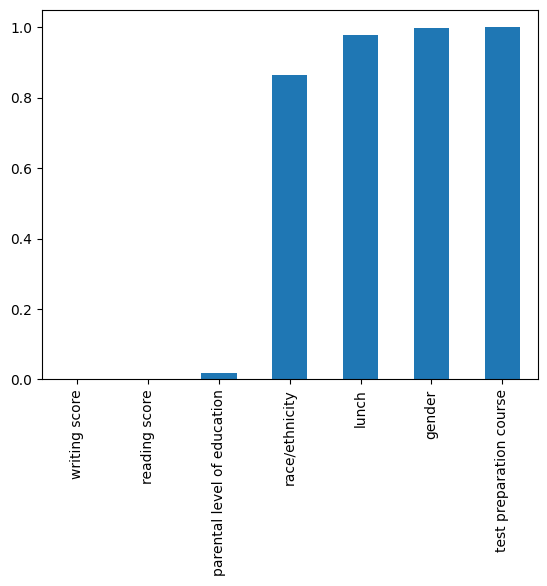

In [11]:
p_values.plot.bar()

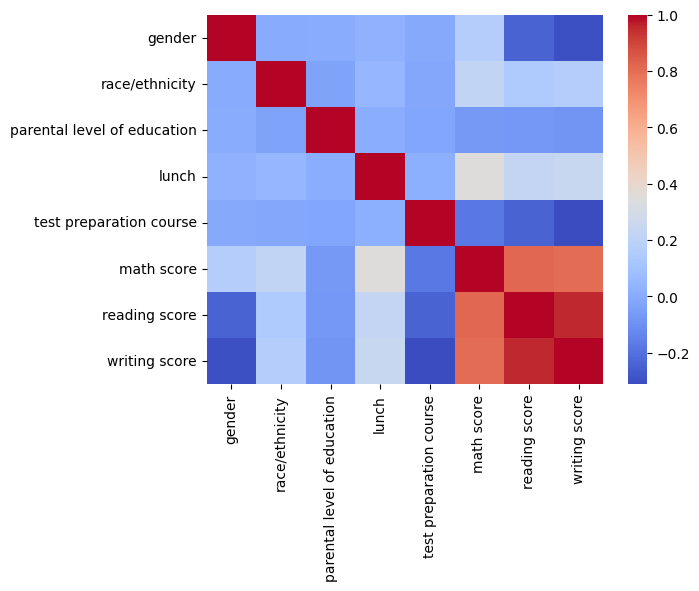

In [12]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show();

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate synthetic data (for demonstration purposes)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model with increased max_iter
LR = LogisticRegression(max_iter=500)

# Initialize RFE with Logistic Regression as the estimator, selecting 10 features
rfe = RFE(estimator=LR, n_features_to_select=10, step=1)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Transform the training and test data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the Logistic Regression model on the selected features
LR.fit(X_train_rfe, y_train)

# Make predictions on the test data
y_pred = LR.predict(X_test_rfe)

# Output the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.79      0.82       106
           1       0.78      0.83      0.80        94

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Generate synthetic data (for demonstration purposes)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model with increased max_iter
LR = LogisticRegression(max_iter=500)

# Initialize RFE with Logistic Regression as the estimator, selecting 10 features
rfe = RFE(estimator=LR, n_features_to_select=10, step=1)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Transform the training and test data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the Logistic Regression model on the selected features
LR.fit(X_train_rfe, y_train)

# Make predictions on the test data
y_pred = LR.predict(X_test_rfe)

# Output the classification report
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


              precision    recall  f1-score   support

           0       0.84      0.79      0.82       106
           1       0.78      0.83      0.80        94

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

Accuracy: 0.81


In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Generate synthetic data (for demonstration purposes)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model with increased max_iter
LR = LogisticRegression(max_iter=500)

# Initialize RFE with Logistic Regression as the estimator, selecting 10 features
rfe = RFE(estimator=LR, n_features_to_select=10, step=1)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Transform the training and test data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the Logistic Regression model on the selected features
LR.fit(X_train_rfe, y_train)

# Make predictions on the test data
y_pred = LR.predict(X_test_rfe)

# Output the classification report
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


              precision    recall  f1-score   support

           0       0.84      0.79      0.82       106
           1       0.78      0.83      0.80        94

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

Accuracy: 0.81


In [16]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib as plt

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

# Initialize the Decision Tree classifier
DT = DecisionTreeClassifier()

# Use RFE for feature selection
rfe = RFE(estimator=DT, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

# Train the Decision Tree classifier on the selected features
DT.fit(rfe.transform(X_train), y_train)

# Predict using the transformed test set
y_pred = DT.predict(rfe.transform(X_test))


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy= accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

recall=recall_score(y_test, y_pred, average='weighted')

f1=f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1}")

Accuracy: 0.775
precision: 0.7754094191842131
recall: 0.775
f1 score: 0.7742450616816771


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
RF=RandomForestClassifier(n_estimators=100, random_state=42)
rfe=RFE(estimator=RF, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

RF.fit(rfe.transform(X_train), y_train)

y_pred= RF.predict(rfe.transform(X_test))

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy= accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')

recall=recall_score(y_test, y_pred, average='weighted')

f1=f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1}")

Accuracy: 0.865
precision: 0.8649552808762938
recall: 0.865
f1 score: 0.8649559388416057
